In [1]:
%pylab inline

from mpl_toolkits.mplot3d import Axes3D

Populating the interactive namespace from numpy and matplotlib


# Hyperwürfel basteln

In [2]:
class HyperCell:
    """
    Simple (n-1)-dimensional cell of a hypercube.
    """
    def __init__(self, parent, idx, value):
        self.dimension = parent.dimension - 1
        self.coordinates = array([pt for pt in parent.coordinates if pt[idx] == value])
        self.full_coordinates = self.coordinates.copy()
        self.coordinates = np.delete(self.coordinates, idx, 1)
        
        if self.dimension > 1:
            self.calculate_subcells()
        
    def calculate_subcells(self):
        """
        Calculate subcells of hypercube.
        """
        self.childs = []

        for value in [0,1]:
            for idx in range(self.dimension):
                child = HyperCell(self, idx, value)
                self.childs.append(child)
        self.childs = array(self.childs)

In [5]:
class Hypercube:
    """
    Simple n-dimensional hypercube.
    """
    def __init__(self, dimension):
        """
        Create hypercube in n-dimension.
        
        params
        ------
        dimension: int, dimension of hypercube
        
        returns
        -------
        hypercube class instance
        """
        self.dimension = dimension
        
        self.compute_coordinates(self.dimension)
        
        self.calculate_subcells()
        
        self.calculate_edges()
            
    def compute_coordinates(self, dimension):
        """
        Compute coordinates of (n+1)-dimensional hypercube from n-dimensional base.
        """
        n, coords = 1, [[0], [1]]
        while n < dimension:
            newcoords = []
            for p in coords:
                pp = p.copy()
                p.insert(0, 0)
                pp.insert(0, 1)
                newcoords.append(p)
                newcoords.append(pp)
            coords = newcoords
            n += 1
        self.coordinates = np.array(coords)
        
    def calculate_subcells(self):
        """
        Calculate subcells of hypercube.
        """
        self.childs = []

        for value in [0,1]:
            for idx in range(self.dimension):
                child = HyperCell(self, idx, value)
                self.childs.append(child)
        self.childs = np.array(self.childs)
        
    def calculate_edges(self):
        edges = []
        pts = self.coordinates
        for i in range(len(pts)):
            pt = pts[i]
            j = 0
            for j in range(i, len(pts)):
                PT = pts[j]
                if (np.linalg.norm(pt - PT) == 1):
                    edges.append([pt, PT])
        self.edges = np.array(edges)

                    

System lin. unabhängiger Vektoren
[[ 1.  0.  0.]
 [ 1.  1.  0.]
 [ 1.  0.  1.]]
Orthogonalisierte Matrix
[[  1.00000000e+00  -3.33333333e-01  -5.00000000e-01]
 [  1.00000000e+00   6.66666667e-01   5.55111512e-17]
 [  1.00000000e+00  -3.33333333e-01   5.00000000e-01]]
Abbildung bezüglich neuer Basis
[[ 0.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
Abbildung bezüglich Standardbasis
[[ 0.66666667 -0.33333333 -0.33333333]
 [-0.33333333  0.66666667 -0.33333333]
 [-0.33333333 -0.33333333  0.66666667]]
Koordinaten
[[-0.5 -0.5 -0.5]
 [ 0.5 -0.5 -0.5]
 [-0.5  0.5 -0.5]
 [ 0.5  0.5 -0.5]
 [-0.5 -0.5  0.5]
 [ 0.5 -0.5  0.5]
 [-0.5  0.5  0.5]
 [ 0.5  0.5  0.5]]
projected coordinates
[[  2.77555756e-17   0.00000000e+00   2.77555756e-17]
 [  6.66666667e-01  -3.33333333e-01  -3.33333333e-01]
 [ -3.33333333e-01   6.66666667e-01  -3.33333333e-01]
 [  3.33333333e-01   3.33333333e-01  -6.66666667e-01]
 [ -3.33333333e-01  -3.33333333e-01   6.66666667e-01]
 [  3.33333333e-01  -6.66666667e-01   3.33333333e-01]

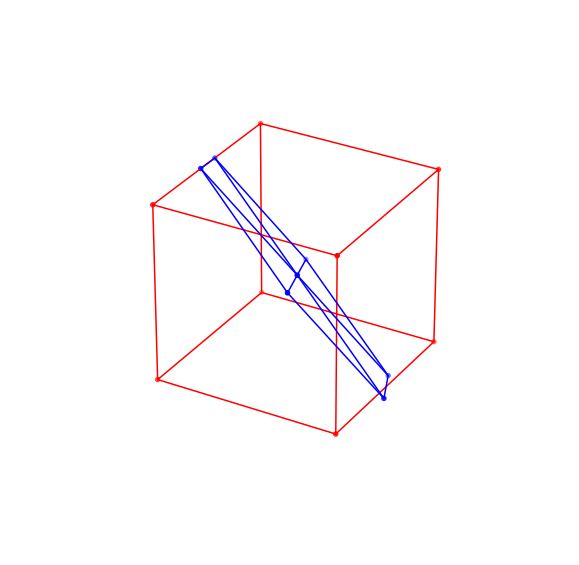

In [41]:
# define dimension and hypercube
N = 3
hc = Hypercube(N)

# neue Basis bestimmen
B = np.identity(N)
B[:, 0] = 1

print("System lin. unabhängiger Vektoren")
print(B)

# Gram-Schmidt-Verfahren
i = 1
while i < N:
    j = 0
    while j < i:
        B[:, i] -= np.dot(B[:, i], B[:, j]) / np.dot(B[:,j], B[:,j]) * B[:, j]
        j += 1
    i += 1
    
B = np.matrix(B)
print("Orthogonalisierte Matrix")
print(B)

# Abbildungsmatrix
P = np.identity(N)
P[:, 0] = 0
print("Abbildung bezüglich neuer Basis")
print(P)

A = B * P * B.I
print("Abbildung bezüglich Standardbasis")
print(A)

# get coordinates
pts = hc.coordinates - np.ones(N) * 0.5
print("Koordinaten")
print(pts)
X = pts[:,0]
Y = pts[:,1]
Z = pts[:,2]

# project coordinates
pts = np.array([np.array(A.dot(pt)).flatten() for pt in pts])
print("projected coordinates")
print(pts)
x = pts[:,0]
y = pts[:,1]
z = pts[:,2]

# get edges
EDGES = hc.edges - np.ones(N) * 0.5


# project edges
edges[:, 0] = np.array([np.array(A.dot(pt)).flatten() for pt in edges[:, 0]])
edges[:, 1] = np.array([np.array(A.dot(pt)).flatten() for pt in edges[:, 1]])

# plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
ax.axis("off")
ax.scatter(x, y, z, c="b")
ax.scatter(X, Y, Z, c="r")

for edge in EDGES:
    x = edge[:, 0]
    y = edge[:, 1]
    z = edge[:, 2]
    ax.plot(x, y, z, c="r")

for edge in edges:
    x = edge[:, 0]
    y = edge[:, 1]
    z = edge[:, 2]
    ax.plot(x, y, z, c="b")

plt.savefig("first-projection.png")
plt.show()